<a href="https://colab.research.google.com/github/vivivicdjdk/machine/blob/main/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA

너무 많은 데이터로 인해 저장공간이 부족한 경우, 군집이나 분류에 영향을 끼치지 않으면서 데이터의 용량을 줄여보자

**차원 축소(dimentionality reduction)**

차원이란?

다차원 배열과 1차원 배열에서 차원이란 용어는 조금 다르게 사용

다차원 배열에서 차원은 배열의 축 개수

1차원 배열에서 차원은 원소의 개수 -> 혼란을 피하기 위해 특성이라 하기로 하자

특성이 많으면?

장점: 선형 모델의 성능이 높아짐

단점 1: 훈련 데이터에 쉽게 과대적합됨

단점 2: 데이터 용량이 급격히 증가하여 저장 공간이 부족

단점 3: 모델 처리속도가 떨어짐

---

차원 축소는 데이터를 가장 잘 나타내는 일부 특성만을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 잇음

줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음

**주성분 분석(PCA, principal component analysis)**

대표적인 차원 축소 알고리즘

데이터에 있는 분산이 큰 방향을 찾는 것

분산은 데이터가 널리 퍼져있는 정도

분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터

찾은 직선(벡터)이 원점에서 출발하면 주성분이라 부름

사이킷런의 PCA모델은 특성마다 평균값을 뺴서 원점에 자동으로 맞춤

---
현재 백터가 하나이므로 주성분은 하나임

원래 특성은 2개지만 하나의 주성분으로 데이터를 표현한다면 2개의 특성이 하나로 줄어들었기 때문에 차원이 축소되었다고 할 수 있음

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-10-30 01:43:35--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 01:43:35--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 01:43:35--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

주성분 분선 알고리즘은 sklearn.decomposition 모듈 아래 PCA 클래스에 있음


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape) # components_ 속성: PCA 클래스가 찾은 주성분 저장

(50, 10000)


n_components: 주성분의 개수를 정하는데 필수로 지정해야 하는 매개변수

첫 번째 차원은 50. 즉, 50개의 주성분을 찾음

두 번째 차원은 항상 원본 데이터의 특성 개수와 같으므로 10000

주의할 점: 주성분 벡터의 크기는 원본 데이터와 동일

주성분을 이미지처럼 출력해보자

이전 절에서 만든 draw_fruits()

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n= len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows <2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j<n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show

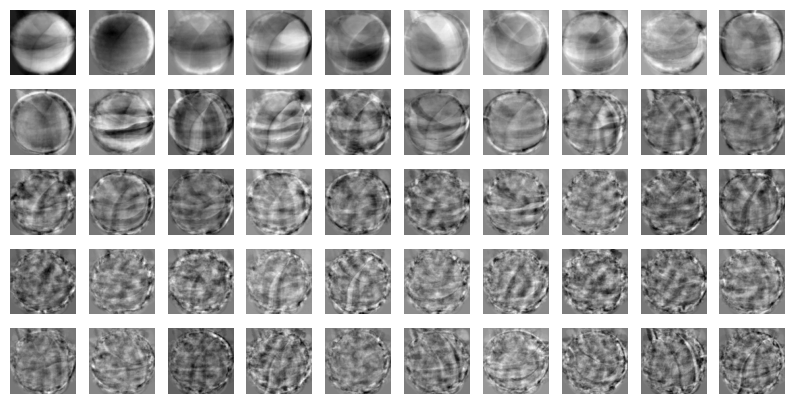

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄

데이터 세트에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음

찾아낸 주성분을 이용하여 원본 데이터의 특성을 50으로 줄여보자

fruits_2d: (300, 10000) 10,000개의 픽셀(특성)을 가진 300개의 이미지

fruits_pca: (300, 50) 50개의 특성을 가진 데이터

In [ ]:
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


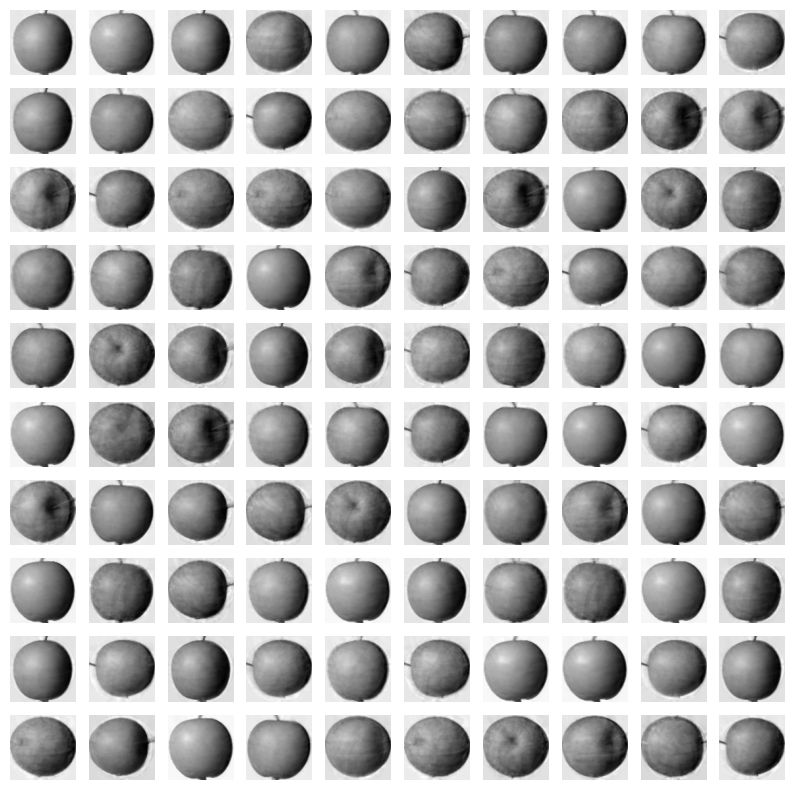

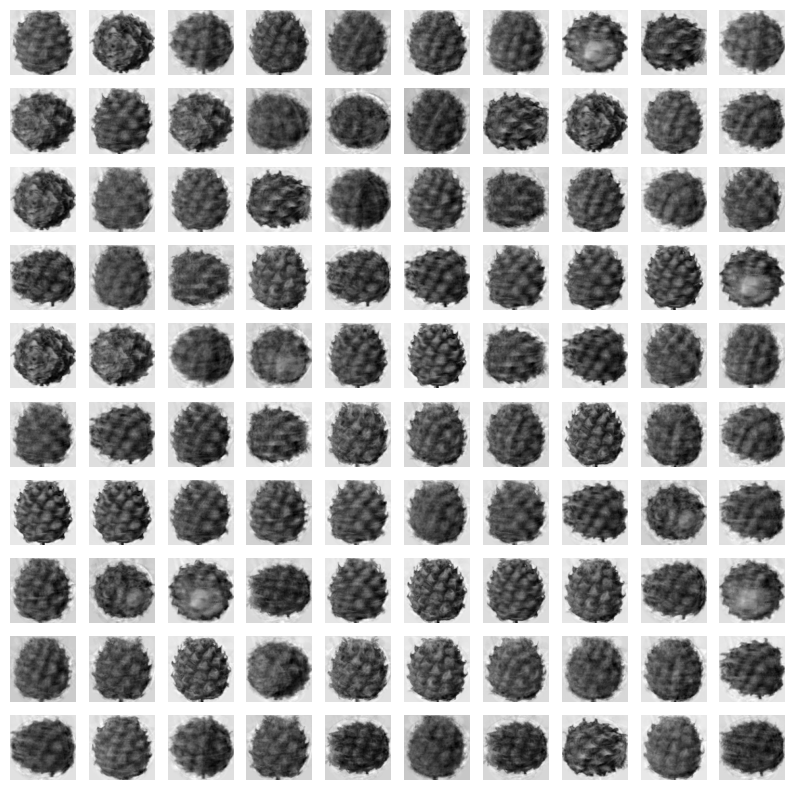

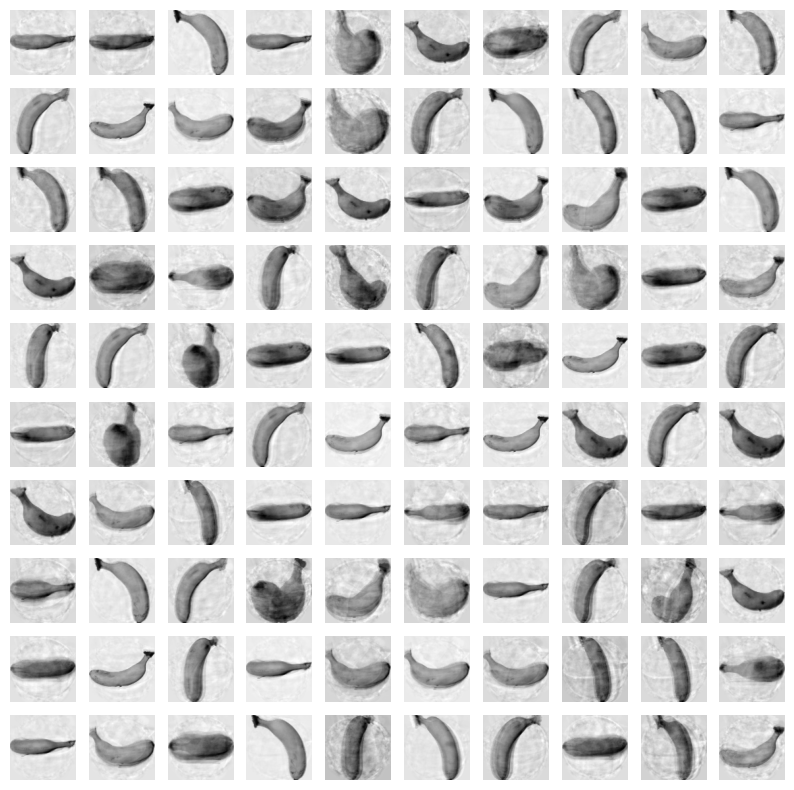

In [ ]:
fruits_reconstruct = fruits_inverse.resahpe(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n") # \n 줄 띄우기 명령어

**설명된 분산**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록

0.9215002989349729


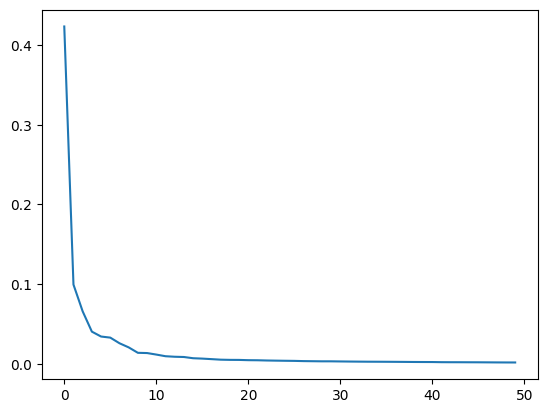

In [ ]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)

처음 10개의 주성분이 대부분의 분산을 표현

## **과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용하고 차이를 찾아보자**

3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해봄

지도 학습 모델이므로 타깃값 설정

사과=0, 파인애플=1, 바나나=2

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
# 원본 데이터인 fruits_2d 사용
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) # fit_time: 각 교차 검증 폴드의 훈련 시간 기록

0.9966666666666667
1.9131292343139648


In [ ]:
# PCA로 축소한 fruits_pca 사용
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.0732795238494873


PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음

n_components 매개변수에 주성분의 개수 대신 분산의 비율로 주성분을 찾을 수 있음

pca는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음

설명된 분산의 50%에 달하는 주성분을 찾아보자

2
0.5229877245800599


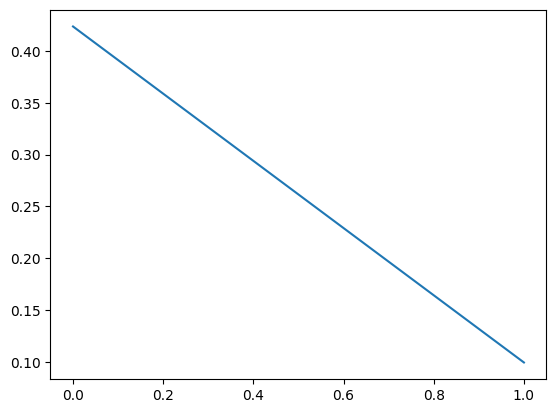

In [ ]:
pca = PCA(n_components=0.5) # 0.5까지만 찾아봄
pca.fit(fruits_2d)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)

원본 데이터 변환

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


교차검증 수행

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04441547393798828


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


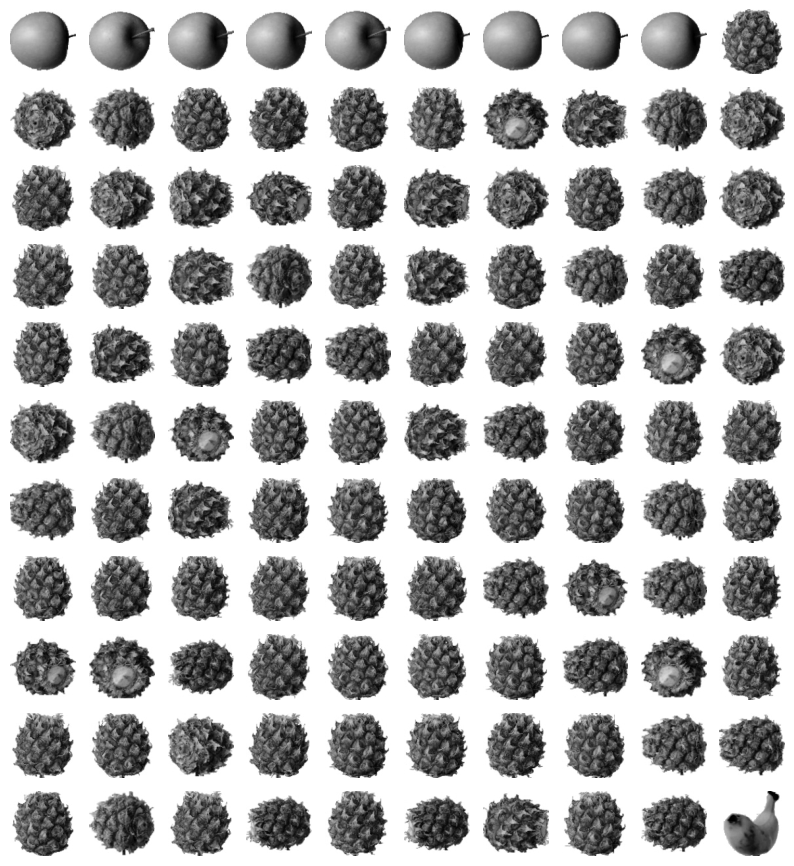

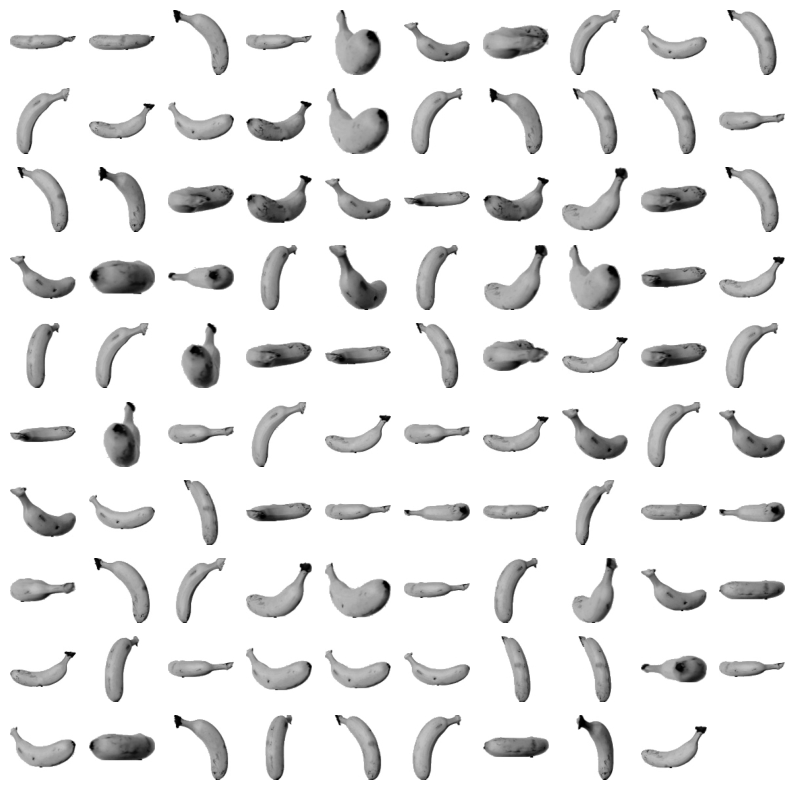

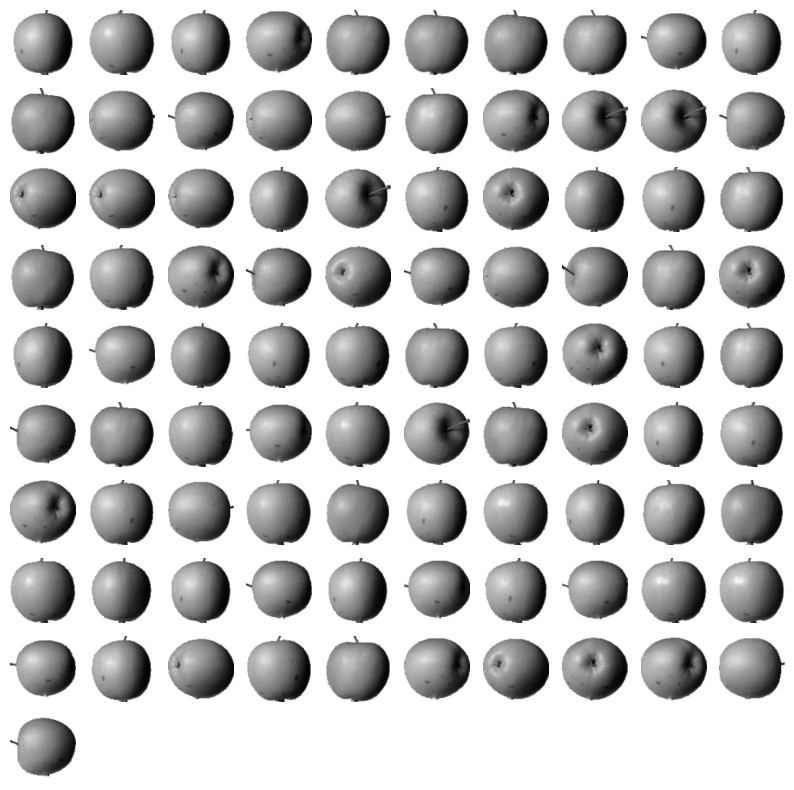

In [ ]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

훈련 데이터의 차원 축소의 장점 중 하나는 시각화

3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움

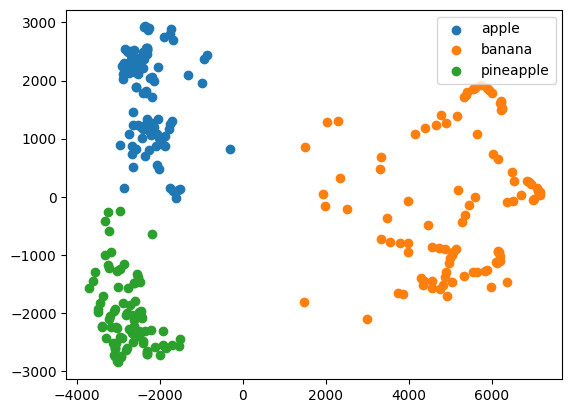

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

차원 축소의 장점

1. 과대 적합 억제
2. 저장 공간 확보
3. 모델 처리속도 상승
4. 모델 성능 상승
5. 시각화 가능